In [412]:
#Import the libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

internet_names = ['area_code', 'TotalConn', 'OtherConn', 'Tech_rank', 'Tech_sd', 'NetC_meas', 'NetC_rank', 'NetC_sd', 'bband_rank', 'bband_sd', 'bband_meas', 'state']

above_average_income_sum=['HI_3500_3999_Tot', 'HI_4000_more_Tot', 'HI_2500_2999_Tot', 'HI_3000_3499_Tot']

plt.style.use("ggplot")
def make_row(row, row2, df, can_sum=False):
    new_row = {}
    for i in row.keys():
        new_row[i] = row[i]
        if i == 'Dialup':
            new_row['Dialup_meas'] = row['Dialup']/row['TotalConn']
        if i == 'OtherConn':
            new_row['Other_meas'] = row['OtherConn']/row['TotalConn']
    for i in list(df):
        if row2[i][list(row2.index)[0]] != 'area_code':
            try:
                new_row[i] = float(row2[i][list(row2.index)[0]])
            except ValueError:
                new_row[i] = row2[i][list(row2.index)[0]]
        else:
            new_row[i] = row2[i][list(row2.index)[0]]
        #if 'rrmse' in i:
            #print(i, row2[i][list(row2.index)[0]])
        #    if int(row2[i][list(row2.index)[0]]) < 3:
        #        return None
        if 'HI_' in i or 'Nil_' in i:
            new_row[i] = row2[i][list(row2.index)[0]]/row2['Tot_Tot'][list(row2.index)[0]]
        if can_sum:
            high_sum = 0
            for j in above_average_income_sum:
                try:
                    high_sum += row[j]
                except:
                    continue
            new_row['high_sum'] = high_sum
    return new_row

def check_row(row, dataframe, is_last=False):
    is_null = 0
    try:
        index = dataframe.ix[dataframe['area_code'] == row['area_code']]
    except:
        return
    for i in sorted(list(index)):
        if (index[i][list(index.index)[0]] == 'null') or row['state'] != 'Vic':
            is_null = 1
        if 'rrmse' in i:
            if int(index[i][list(index.index)[0]]) < 3:
                is_null = 1
    if (is_null == 0):    
        d = make_row(row, index, dataframe, True)
        #print(d)
        if d == None:
            return
        return d

def plot_df(df, h1, h2, p, t1, t2):
    d = pd.DataFrame({h1:df[h1], h2:df[h2]}, columns=[h1, h2])
    sns.set_style('ticks')
    sns.regplot(df[h1], df[h2], ci=None)
    sns.despine()
    #ax = d.plot(kind=p, x=h1, y=h2)
    plt.title(t1 + " vs " + t2)
    plt.xlabel(t1)
    plt.ylabel(t2)
    print("Pearson Correlation of {0} vs {1}: ".format(h1, h2), d[h1].corr(d[h2]))

    return d

def correlate(df, compare_df, internet, index, rate=True):
    d = {}
    for i in df:
        if rate:
            if i != 'area_code' and 'rate' in i:
                d[i] = [compare_df[internet].corr(compare_df[i])]
        else:
            if i != 'area_code':
                d[i] = [compare_df[internet].corr(compare_df[i])]
    return pd.DataFrame(d, index=index)

In [425]:
#Read in CSV Files
internet_df = pd.read_csv("internet.csv")
health_df = pd.read_csv("health.csv")
#hospital_df = pd.read_csv("hospital.csv")
chronic_df = pd.read_csv("chronic.csv")
income_df = pd.read_csv("income.csv")


In [414]:
compare_df = pd.DataFrame()

In [415]:
#Make a new dataframe containing area codes that are in both datasets that are not null
#for i in [health_df, hospital_df, chronic_df, income_df]:
for key,row in internet_df.iterrows():
    d = check_row(row, income_df)
    #d1 = check_row(d, hospital_df)
    d2 = check_row(d, chronic_df)
    d3 = check_row(d2, health_df, True)
    compare_df = compare_df.append(d3, ignore_index=True)


        

Pearson Correlation of Dialup_meas vs musculo_rate:  0.639827815313


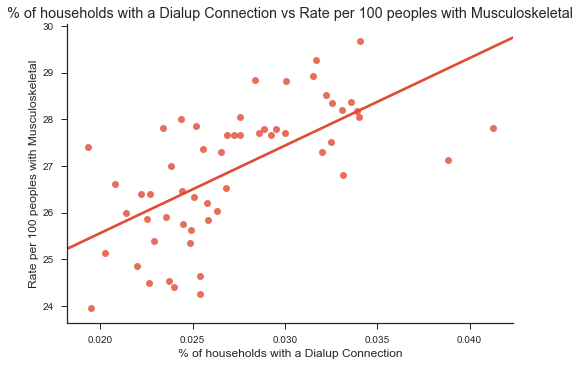

Pearson Correlation of bband_meas vs musculo_rate:  -0.686207210059


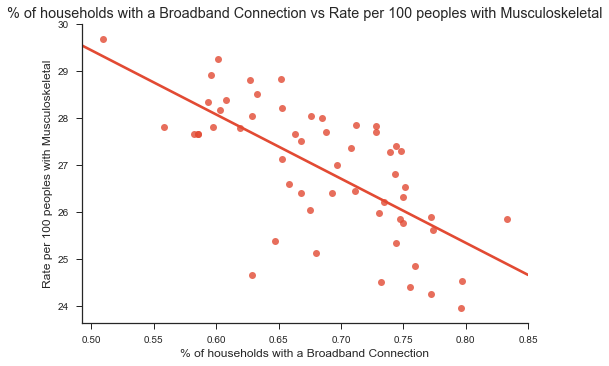

In [431]:
#'''
#ax = []
#for i in ['bband_meas', 'NetC_meas', 'Dialup_meas', 'Other_meas']:
#    for j in list(chronic_df):
#        if 'rate' in j:
#            ax.append(plot_df(compare_df, i, j, 'scatter'))
#'''

plot_df(compare_df, 'Dialup_meas', 'musculo_rate', 'scatter', '% of households with a Dialup Connection',
        'Rate per 100 peoples with Musculoskeletal')
plt.show()
plot_df(compare_df, 'bband_meas', 'musculo_rate', 'scatter', '% of households with a Broadband Connection', 
        'Rate per 100 peoples with Musculoskeletal')
#sns.set_style('ticks')
#sns.regplot(compare_df['Dialup_meas'], compare_df['musculo_rate'], ci=None)
#sns.despine()
#compare_df.plot(x='HI_2000_2499_Tot',y='rsp_rate', kind='scatter')
plt.show()

In [410]:
list(compare_df)

['Dialup',
 'Dialup_meas',
 'HI_1000_1249_Tot',
 'HI_1250_1499_Tot',
 'HI_1500_1999_Tot',
 'HI_1_199_Tot',
 'HI_2000_2499_Tot',
 'HI_200_299_Tot',
 'HI_2500_2999_Tot',
 'HI_3000_3499_Tot',
 'HI_300_399_Tot',
 'HI_3500_3999_Tot',
 'HI_4000_more_Tot',
 'HI_400_599_Tot',
 'HI_600_799_Tot',
 'HI_800_999_Tot',
 'LGA_Name',
 'Negative_Nil_income_Tot',
 'NetC_meas',
 'NetC_rank',
 'NetC_sd',
 'OtherConn',
 'Other_meas',
 'PvtBband',
 'RRMSE',
 'Tech_rank',
 'Tech_sd',
 'Tot_Tot',
 'TotalConn',
 'area_code',
 'area_name',
 'arthritis_rate',
 'arthritis_rrmse',
 'asthma_rate',
 'asthma_rrmse',
 'bband',
 'bband_meas',
 'bband_rank',
 'bband_sd',
 'circ_rate',
 'circ_rrmse',
 'copd_rate',
 'copd_rrmse',
 'diabetes_rate',
 'diabetes_rrmse',
 'health_count',
 'health_rate',
 'hg_choles_rate',
 'hg_choles_rrmse',
 'high_sum',
 'hypertens_rate',
 'hypertens_rrmse',
 'mntl_bh_p_rate',
 'mntl_bh_p_rrmse',
 'musculo_rate',
 'musculo_rrmse',
 'respirtry_rate',
 'respirtry_rrmse',
 'state']

In [424]:
a = pd.DataFrame()
n = sorted(list(income_df), key=lambda x: x[:-1])
#n.sort()
for i in ['bband_meas', 'NetC_meas', 'Dialup_meas']:
    if i != 'area_code' and i != 'state':
        d = correlate(list(chronic_df+health_df), compare_df, i, [i], True)
    a = a.append(d)
#bbad_measure_df = pd.DataFrame(columns=list(chronic_df)+list(income_df))

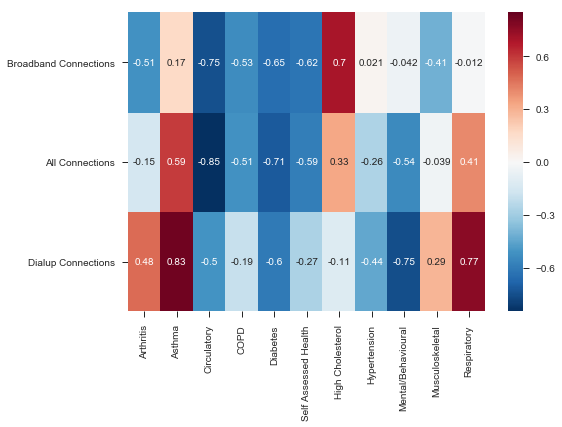

In [423]:
sns.heatmap(a, annot=True, yticklabels=['Broadband Connections', 'All Connections', 'Dialup Connections'],
                xticklabels=['Arthritis', 'Asthma', 'Circulatory', 'COPD',
                             'Diabetes', 'Self Assessed Health', 'High Cholesterol', 'Hypertension', 'Mental/Behavioural'
                             ,'Musculoskeletal', 'Respiratory'])
plt.show()

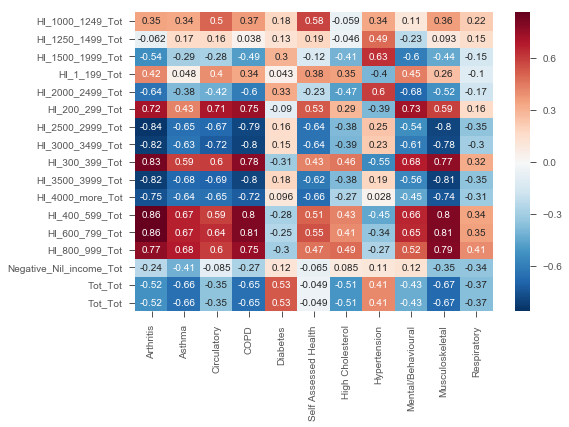

In [239]:
sns.heatmap(b, annot=True,                 xticklabels=['Arthritis', 'Asthma', 'Circulatory', 'COPD',
                             'Diabetes', 'Self Assessed Health', 'High Cholesterol', 'Hypertension', 'Mental/Behavioural'
                             ,'Musculoskeletal', 'Respiratory'])
plt.show()

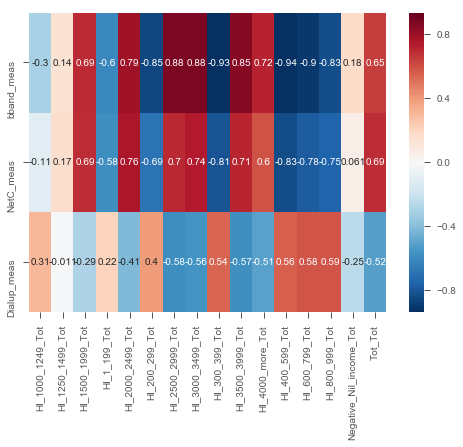

In [243]:
sns.heatmap(c, annot=True)
plt.show()

In [419]:
sorted(compare_df['high_sum'])

[0.030660826509236336,
 0.054423667317890036,
 0.057061510172608104,
 0.058483754512635377,
 0.064366904573090147,
 0.064620019739234327,
 0.066454487587523869,
 0.067106312051597936,
 0.069706953355297391,
 0.07306064880112835,
 0.075049115913555994,
 0.077093866783908546,
 0.085648784961027055,
 0.089889535373977564,
 0.091553718143283266,
 0.09638708030128941,
 0.098279479647503151,
 0.10138987883107628,
 0.10650147049621425,
 0.11213281333858099,
 0.11430613217178248,
 0.1160501666931259,
 0.11751924902436453,
 0.11832416419805333,
 0.12127759978143707,
 0.12636857820993799,
 0.12948250801425643,
 0.13336534200029546,
 0.13423596133876506,
 0.13515927359333135,
 0.13905630599843422,
 0.14576542574483903,
 0.14934590872319015,
 0.16456824080889476,
 0.16462404769791322,
 0.16708747425911002,
 0.16932815797014614,
 0.17098808689558512,
 0.18069002612571078,
 0.18344092057255124,
 0.18711482475707966,
 0.1918371279021226,
 0.19446357251067345,
 0.20682453599218512,
 0.2119318961966222